# **Introduction**

Payam Taebi
400104867

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [1]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-12 16:25:32--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1f69c65087785fd371a32b6de5.dl.dropboxusercontent.com/cd/0/inline/CQ5quuIfNwTqN0y_6MfM6BNh9hdTMVoBcgiQQEJ3Lk_HUaq7l9e8K8VFee4gy5LK9Uj14jW3UTmkSAzKI_Y__D3G6pcQ4oc2h2BhiKX74dLSAeiW1-pO0BSou54PdpFbBaU7Y6FInIAmB6EGv-5Dm51u/file# [following]
--2024-04-12 16:25:32--  https://uc1f69c65087785fd371a32b6de5.dl.dropboxusercontent.com/cd/0/inline/CQ5quuIfNwTqN0y_6MfM6BNh9hdTMVoBcgiQQEJ3Lk_HUaq7l9e8K8VFee4gy5LK9Uj14jW3UTmkSAzKI_Y__D3G6pcQ4oc2h2BhiKX74dLSAeiW1-pO0BSou54PdpFbBaU7Y6FInIAmB6EGv-5Dm51u/file
Resolving uc1f69c65087785fd371a32b6de5.dl.dropboxusercontent.com (uc1f69c65087785fd371a32b6de5.dl.dropboxusercontent.com)... 162.125.1.15, 2620:1

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [2]:
file_path = '/HousingData.csv'

housing_data = pd.read_csv(file_path)

print("Top 5 rows of the dataframe:")
print(housing_data.head())


print("\nChecking for missing values:")
print(housing_data.isnull().sum())

housing_data.fillna(housing_data.mean(), inplace=True)

print("\nChecking for missing values after imputation:")
print(housing_data.isnull().sum())


Top 5 rows of the dataframe:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  

Checking for missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Checking for missing values after imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE      

Get a brief description of the dataset

In [3]:
print("Information about the dataset:")
print(housing_data.info())

print("\nSummary statistics of the dataset:")
print(housing_data.describe())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None

Summary statistics of the dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.0839

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [4]:
features_array = housing_data.drop(columns=['MEDV']).values
print("Shape of the features array:", features_array.shape)

Shape of the features array: (506, 12)


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

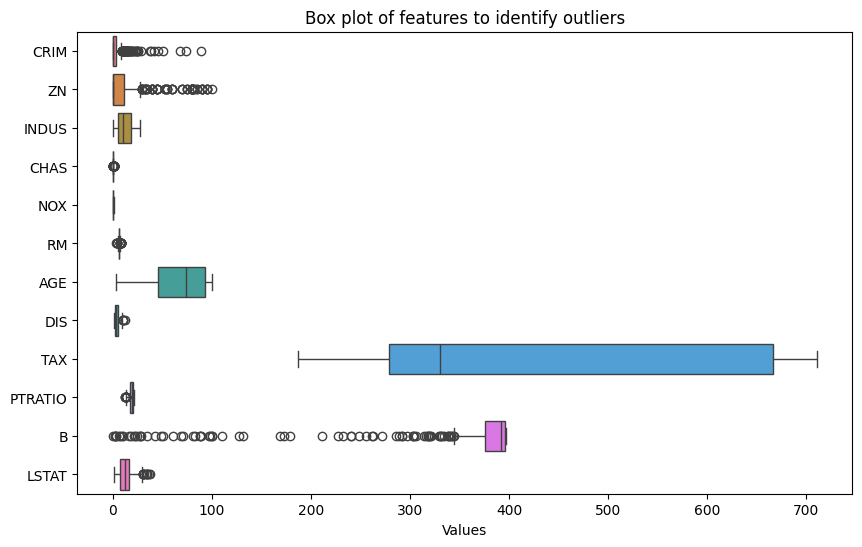

Outliers are present in the data. Scaling data using StandardScaler...
Data scaled successfully.


In [5]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_data.drop(columns=['MEDV']), orient='h')
plt.title('Box plot of features to identify outliers')
plt.xlabel('Values')
plt.show()

# outlayer
if housing_data.apply(lambda x: np.abs(x - x.mean()) / x.std()).max().max() > 3:
    print("Outliers are present in the data. Scaling data using StandardScaler...")
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_array)
    print("Data scaled successfully.")
else:
    print("No outliers present in the data. Scaling not required.")


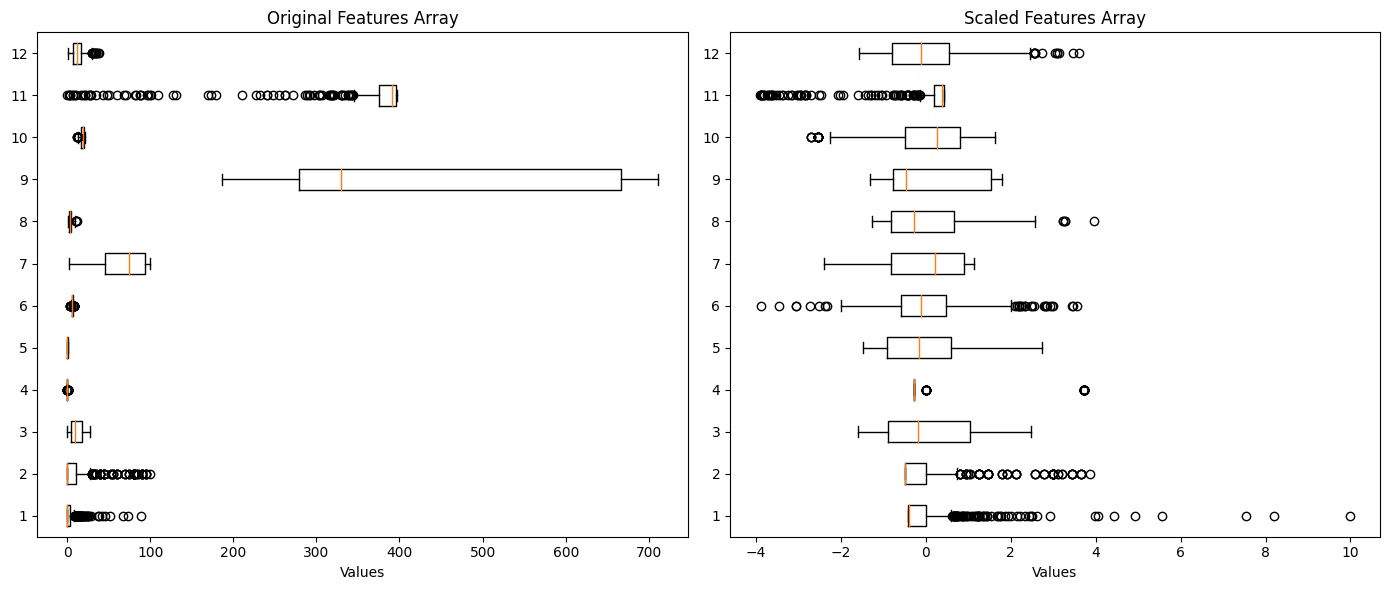

In [6]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(features_array, vert=False)
plt.title('Original Features Array')
plt.xlabel('Values')

plt.subplot(1, 2, 2)
plt.boxplot(scaled_features, vert=False)
plt.title('Scaled Features Array')
plt.xlabel('Values')

plt.tight_layout()
plt.show()


add polynomial features to increase model complexity!



In [7]:
from sklearn.preprocessing import PolynomialFeatures

y = housing_data['MEDV'].values

poly_features = PolynomialFeatures(degree=2)
poly_features.fit(scaled_features,y)
X = poly_features.transform(scaled_features)


#poly_features_array = poly_features.fit_transform(features_array)

print("Shape of the original features array:", features_array.shape)
print("Shape of the new polynomial features array:", X.shape)

Shape of the original features array: (506, 12)
Shape of the new polynomial features array: (506, 91)


Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [8]:
y = housing_data['MEDV'].values

print("Shape of the target array y:", y.shape)

Shape of the target array y: (506,)




Split the dataset into two parts such that the training set contains 80% of the samples.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (404, 91)
Shape of X_test: (102, 91)
Shape of y_train: (404,)
Shape of y_test: (102,)


# Training


Fit a linear regressor to the data. (Use sklearn)


In [10]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
print("Coefficients:", linear_regressor.coef_)
print("Intercept:", linear_regressor.intercept_)

Coefficients: [ 6.71326437e-15  2.61543210e+00  8.23937159e-01  2.71362629e-01
 -3.48211983e+00 -1.29409137e+00  3.44585661e+00 -1.21943076e+00
 -1.81707978e+00 -1.35705037e+00 -7.62724086e-01  9.41284776e-02
 -3.26790109e+00  1.88815533e-01 -2.12293611e+00  3.27201664e+00
  2.99592944e+00 -2.33583776e+00  3.47631370e-01  2.08741825e-01
  2.21883471e+00 -2.33322440e+00 -2.04447912e+00  7.41756805e-03
  1.19322150e+00 -8.41126027e-02  1.01385910e-01  2.74709658e-01
 -2.78021092e+00 -1.52798130e-01  7.61588328e-01 -1.08630659e+00
  2.97124880e+00 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00
  1.31321171e+00 -3.11014224e-01 -5.10197825e-01  1.28252455e+00
  1.32809034e+00  1.38205448e+00 -6.50905063e-01 -1.06080996e+00
  7.72225398e-01 -5.06351131e-01  1.37177961e+00 -1.08949576e+00
 -9.50138209e-01 -4.45437289e-01 -1.69626905e+00  5.47158139e-01
 -1.88581634e-01  6.91851939e-03 -4.71226094e-01 -3.79170284e-01
 -1.24093403e+00  3.76740641e-01  3.63408849e+00  1.95669949e+00
 -2.0762819

Get the coefficients of the variables and visualize it

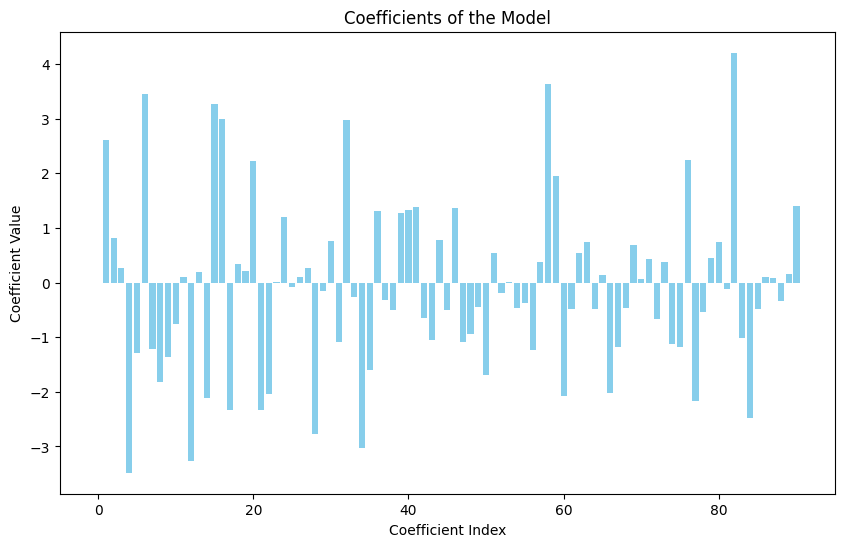

In [11]:
coefficients = linear_regressor.coef_
indices = range(len(coefficients))

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(indices, coefficients, color='skyblue')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Model')
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred1 = linear_regressor.predict(X_train)

r2_train = r2_score(y_train, y_train_pred1)

mse_train = mean_squared_error(y_train, y_train_pred1)

print("R-squared score on the training dataset:", r2_train)
print("Mean Squared Error on the training dataset:", mse_train)

R-squared score on the training dataset: 0.9233615957926449
Mean Squared Error on the training dataset: 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [13]:
y_test_pred1 = linear_regressor.predict(X_test)

print(y_test_pred1)

[26.60760472 39.62214268 18.71401934 21.00627478 15.36932115 18.14967249
 19.2680689  14.04520907 20.41411804 19.68358046 19.34721612 17.80080883
  9.52923494 17.56130221 17.61765281 23.1886407  19.83784911  9.82571722
 48.00938013 13.01200313 24.67113881 28.75366122 15.14797668 19.48768303
 16.8711114  16.54597743 17.07120558 13.34377675 16.66485127 19.34855953
 18.50229727 23.95889069 15.48239335 25.70102382 13.69224402 17.48588361
 33.1589375  20.10130817 20.24277819 21.68697931 16.91569466 31.33039866
 53.78155342 15.35787882 27.30502419 15.90970181 14.76748839 23.49841731
 17.57527936 29.19894908 19.95253249 33.61207695 17.02933983 26.86934524
 44.01327048 23.0722288  13.43102214 32.42020215 25.15187612 12.20309801
 25.03914004 29.01333968 31.99975955 14.25741358 27.2478974  13.81980117
 14.35877776 24.56841459 29.12596225 12.07120755 21.52505912 27.39851469
  9.60239834 22.99803726 19.8464662   7.55139317 22.13069349 49.95089019
 11.35178549 11.98183645 18.34848076 12.31262512 15

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [14]:
alpha = 0.5
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

[ 0.         -0.          0.         -0.          0.         -0.
  2.71044561 -0.         -0.         -0.17551806 -0.87919831  0.
 -3.61571562 -0.09172222  0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.21657471 -0.
 -0.          0.         -0.          0.09712834  0.          0.
 -0.         -0.20798319 -0.1485112  -0.          0.         -0.
 -0.          0.         -0.          0.7562266  -0.          0.
 -0.85199921 -0.59720675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.26961623  0.          0.         -0.
 -0.8353172   0.         -0.         -0.         -0.24304235 -0.
  0.46962857]


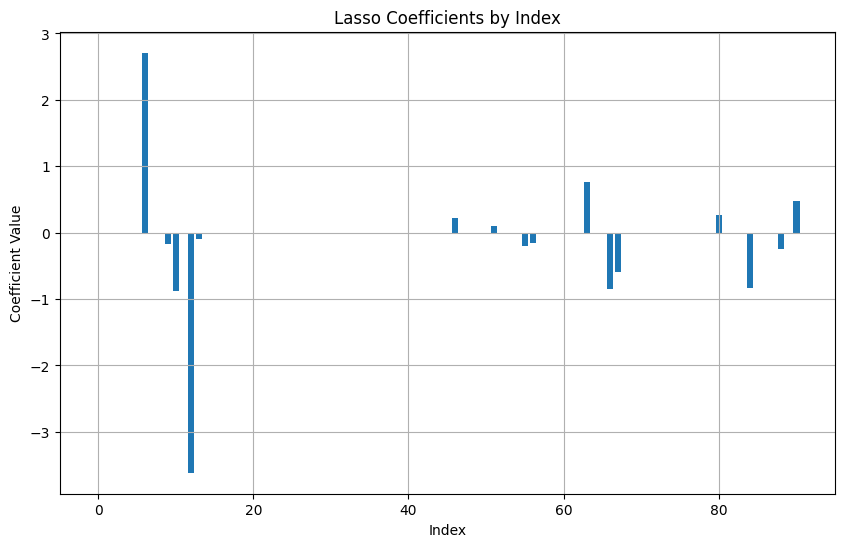

In [15]:
import numpy as np
import matplotlib.pyplot as plt


coefficients = lasso.coef_
print(coefficients)


indices = np.arange(len(coefficients))

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(indices, coefficients)
plt.xlabel('Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients by Index')
plt.grid(True)
plt.show()


1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

1. **Observations about weight distribution with L1 regularization:**
   - When we apply L1 regularization, also known as Lasso regularization, to our model, we notice that it tends to encourage sparsity in the weight distribution.
   - This means that many coefficients become exactly zero, resulting in a sparse weight distribution.
   - Essentially, L1 regularization helps in feature selection by shrinking less important feature coefficients towards zero, effectively removing them from the model.
   
2. **Effect of different values of the regularization parameter (alpha) on sparsity:**
   - The regularization parameter, often denoted as alpha, controls the strength of regularization applied to the model.
   - Higher values of alpha lead to stronger regularization, which in turn results in a sparser model with more coefficients set to zero.
   - Conversely, lower values of alpha result in weaker regularization, allowing more coefficients to retain non-zero values.
   - Therefore, by adjusting the alpha parameter, we can control the sparsity of the model. Higher alpha encourages stronger sparsity, while lower alpha allows for more non-zero coefficients.
   - It's important to select an appropriate value for alpha based on the trade-offs between model complexity, interpretability, and predictive performance. This selection can be guided by techniques like cross-validation to find the optimal alpha value for our specific dataset and task.


Get the score value on train *dataset*


In [16]:
y_train_pred2 = lasso.predict(X_train)

r2_train = r2_score(y_train, y_train_pred2)
print("R² score on training set:", r2_train)

mse_train = mean_squared_error(y_train, y_train_pred2)
print("Mean Squared Error on training set:", mse_train)

R² score on training set: 0.8171286694481938
Mean Squared Error on training set: 15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [17]:
y_test_pred2 = lasso.predict(X_test)
print(y_test_pred2)

[25.01553605 32.02170508 16.56431707 23.67545781 17.13464034 21.69118954
 18.08272601 14.79576716 20.40693987 19.6387817  21.53217387 19.92343501
  6.64235117 21.28994714 19.61841959 22.15653103 18.10047426 11.57157362
 42.41465504 16.42067495 21.39943226 25.60136064 15.78693485 22.04815612
 17.9021186  17.00238679 19.88982538 13.39822411 21.17351703 19.18396855
 18.45930572 24.45954182 22.28497567 22.26103013 14.87175003 17.51351063
 32.12600448 20.57590791 22.56516819 20.96313305 15.55620789 27.56743981
 44.34319575 18.69292057 24.52131935 17.12080258 16.94276939 24.60012608
 18.02835641 28.77188928 21.29219328 31.99034286 17.89886858 25.3993675
 39.45589001 22.16073425 17.33354312 28.94005254 23.43768009 17.00480941
 24.78746672 31.5308728  28.44268606 19.11754198 26.06453555 17.74025689
 17.46661041 24.07595784 27.21904407 12.41794401 18.96854429 25.30678507
 12.52088818 21.93187535 22.04846018  8.76834845 20.47808211 41.66158441
 15.06191799 13.48259615 21.44899084 12.04377305 21.

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

Get the coefficients of the variables and visualize it.

[ 0.          0.05912156  0.51116396 -0.28467561 -0.32455353 -0.85827735
  3.30888276 -1.15903729 -1.59593251 -0.53180157 -0.91042787  0.42828162
 -2.94077889  0.16087076 -0.2517118   0.62754054  1.60530016 -1.09008989
  0.19857273 -0.21466179  0.91315274 -0.33329639 -0.37069977 -0.0685445
  0.53227529  0.13451302  0.04174477  0.21402759 -0.19753069 -0.13818418
  0.11128147 -0.41118718  0.69356948 -0.05349153 -0.33153368 -0.6523907
  0.65774546  0.00626011  0.17510478  0.56882038  0.84405893  0.75253857
 -0.01735362 -0.74138428  0.38541275 -0.84892644  0.44774634 -0.95605317
 -0.87633987 -0.11780543 -0.84245313  0.77371237 -0.05986682 -0.05282303
 -0.5612907  -0.35054369 -1.10824908 -0.28920456  0.95796985  0.161939
 -0.72743981 -0.23024552  0.59678367  0.61007814 -0.35547651  0.25507285
 -1.39082276 -1.30777268 -0.34506817  0.43935663  0.18768566  0.33640313
  0.12071674  0.17082987 -0.88889616 -0.93434533  1.1011708  -0.55229718
 -0.01954442 -0.25679014  0.78714857  0.62433033  1.952

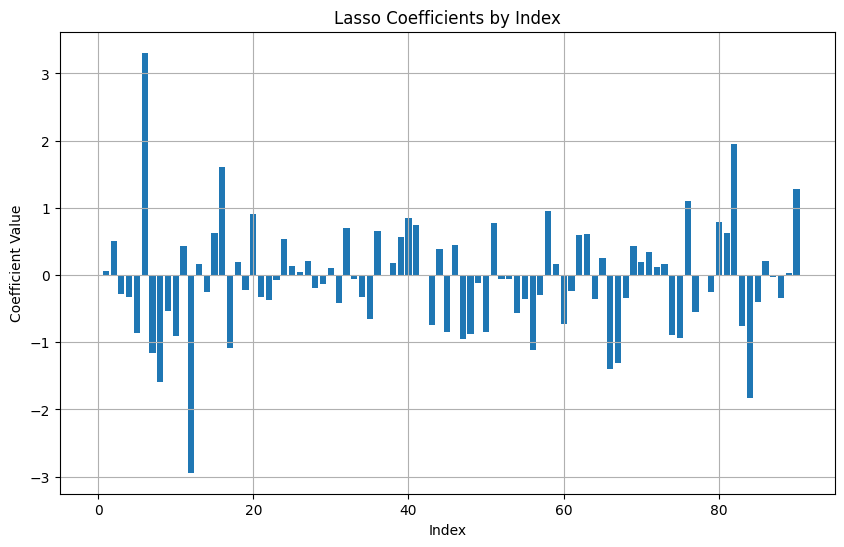

In [19]:
coefficients = ridge.coef_
print(coefficients)


indices = np.arange(len(coefficients))

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(indices, coefficients)
plt.xlabel('Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients by Index')
plt.grid(True)
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?


*L1 Regularization (Lasso):*
- Encourages sparsity in the coefficient weights by setting many of them exactly to zero.
- Leads to a sparse solution where only a subset of features is selected while others are effectively ignored.
- Useful for feature selection and building simpler, more interpretable models.
- Can be sensitive to correlated features as it tends to arbitrarily select one feature among highly correlated ones.

*L2 Regularization (Ridge Regression):*
- Shrinks the coefficient weights towards zero but rarely sets them exactly to zero.
- Does not encourage sparsity but rather reduces the impact of less important features.
- Generally more stable and less sensitive to correlated features compared to L1 regularization.
- Useful for preventing overfitting and improving the generalization performance of the model.

**Influence of Regularization Parameter on Ridge Regression:**
- The regularization parameter, often denoted as lambda or alpha, controls the strength of regularization applied in Ridge Regression.
- Increasing the regularization parameter increases the magnitude of the penalty applied to the coefficients.
- As the regularization parameter becomes larger, the coefficients are shrunk more aggressively towards zero, leading to smaller overall magnitudes.
- Conversely, decreasing the regularization parameter reduces the regularization effect, allowing the coefficients to retain larger magnitudes.
- The choice of the regularization parameter is crucial in balancing the trade-off between model complexity and bias-variance trade-off. Too high a value can lead to underfitting, while too low a value can lead to overfitting.


Get the score value on train *dataset*

In [20]:
y_train_pred3 = ridge.predict(X_train)

r2_train = r2_score(y_train, y_train_pred3)
print("R² score on training set:", r2_train)

mse_train = mean_squared_error(y_train, y_train_pred3)
print("Mean Squared Error on training set:", mse_train)

R² score on training set: 0.9143940529441623
Mean Squared Error on training set: 7.4368800090845655


Predict the value of "y" for each "x" belonging to the "testing" set



In [21]:
y_test_pred3 = ridge.predict(X_test)
print(y_test_pred3)

[26.64874045 37.58387034 19.27657644 21.94197185 15.3028101  20.12028532
 19.06550135 13.09220054 21.53629599 19.59853597 19.98066811 17.71773856
  7.45618135 19.4698435  17.83085991 22.41342776 19.03460611 10.83733093
 47.87734976 13.23733086 25.94978663 28.67626209 15.62739061 20.87266644
 16.88618107 16.70243714 18.15202381 12.99400863 19.06044753 19.1619615
 18.49185044 23.96483655 16.81029968 24.22140047 14.71608764 17.14764076
 33.00621736 20.36005585 21.56765845 22.00579786 16.87716829 30.83029389
 52.86535583 16.40416721 26.70438602 16.00962769 15.37456958 24.22203195
 18.0413712  28.35774744 18.65466298 33.07812494 17.01116837 25.34703163
 43.22198358 23.00525594 14.66623572 32.34427145 25.00498764 14.21572885
 24.95594853 33.4162596  30.78344757 16.16942493 25.19231399 16.02456508
 14.58662856 24.41159615 30.32473275 12.3838725  20.94435871 27.5999913
 10.37505112 21.25995733 20.86051995  5.76335445 20.67914828 49.65506758
 11.15867412 13.79119622 19.12026295 12.02135127 17.9

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [22]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

basic_train_rmse = mean_squared_error(y_train, y_train_pred1)
basic_train_r2 = r2_score(y_train, y_train_pred1)
basic_test_rmse = mean_squared_error(y_test, y_test_pred1)
basic_test_r2 = r2_score(y_test, y_test_pred1)

lasso_train_rmse = mean_squared_error(y_train, y_train_pred2)
lasso_train_r2 = r2_score(y_train, y_train_pred2)
lasso_test_rmse = mean_squared_error(y_test, y_test_pred2)
lasso_test_r2 = r2_score(y_test, y_test_pred2)

ridge_train_rmse = mean_squared_error(y_train, y_train_pred3)
ridge_train_r2 = r2_score(y_train, y_train_pred3)
ridge_test_rmse = mean_squared_error(y_test, y_test_pred3)
ridge_test_r2 = r2_score(y_test, y_test_pred3)

summary_df = pd.DataFrame({
    'Model': ['Basic Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE test': [basic_test_rmse, lasso_test_rmse, ridge_test_rmse],
    'MSE train': [basic_train_rmse, lasso_train_rmse, ridge_train_rmse],
    'R2 test': [basic_test_r2, lasso_test_r2, ridge_test_r2],
    'R2 train': [basic_train_r2, lasso_train_r2, ridge_train_r2]
})

print(summary_df)


              Model   MSE test  MSE train   R2 test  R2 train
0  Basic Regression  18.122077   6.657839  0.752882  0.923362
1  Lasso Regression  16.227427  15.886655  0.778718  0.817129
2  Ridge Regression  15.110037   7.436880  0.793955  0.914394


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

the Ridge Regression model performed the best on the test data, as it has the lowest Mean Squared Error (MSE) on the test set compared to the other models.

The results on the training data differ among the models primarily because each regression technique imposes different constraints on the model parameters during training:

1. **Basic Regression**: This model seems to have the lowest MSE on the training data, suggesting it might be overfitting. Overfitting occurs when a model learns to fit the noise in the training data rather than the underlying pattern, leading to poor generalization to unseen data.

2. **Lasso Regression**: Lasso Regression performs both variable selection and regularization, where it penalizes the absolute size of the coefficients. This penalty can shrink some coefficients to zero, effectively performing feature selection by excluding some predictors from the model. The higher MSE on the training data compared to the basic regression indicates that Lasso's regularization might be constraining the model too much, leading to slightly worse performance on the training set.

3. **Ridge Regression**: Ridge Regression also applies regularization, but it penalizes the squared size of the coefficients. This penalty usually leads to less aggressive shrinking of coefficients compared to Lasso Regression. Consequently, Ridge Regression achieves lower MSE on the training data compared to Lasso, but still performs well on the test data, as indicated by its lowest MSE among the three models.

In summary, while Basic Regression might have the lowest MSE on the training data, it likely suffers from overfitting and does not generalize well to unseen data. Lasso Regression performs variable selection, which can lead to higher training MSE but might improve generalization. Ridge Regression strikes a balance between reducing overfitting and maintaining good performance on unseen data, resulting in the best performance on the test data in this case.
